# DAV 6150 Project 3

- by Group Manling Yang, Xiaojia He, Qi Sun
- The video link: https://screencast-o-matic.com/watch/cYjee1EPqN

***
## Introduction

The purpose of this study is to construct a series of different models to predict diamond cut category. This dataset is comprised of 53940 observations with 10 variables.

<img src="https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/picture/gia-diagramcut.jpg" width="500">


**Independent variables:**

1. price: price in US dollars (\$326--\$18,823), continuous data.

2. carat: weight of the diamond (0.2--5.01), continuous data.

3. color: diamond colour, from D (best) to J (worst), ordinal data.

4. clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)), categorical data.

5. x: length in mm (0--10.74), continuous data.

6. y: width in mm (0--58.9), continuous data.

7. z: depth in mm (0--31.8), continuous data.

8. depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79), , continuous data.

9. table: width of top of diamond relative to widest point (43--95), continuous data.

**Dependent variable:**

**cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal), ordinal data

<img src="https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/picture/6PannTm.jpg" width="500">

Reference: https://ggplot2.tidyverse.org/reference/diamonds.html 

**Domain Knowledge:**

A diamond’s cut refers to the style in which the stone is shaped. Cut does not mean the jewel’s shape itself but rather the proportions and facets of its design. It's a diamond’s cut that determines its overall look as well as its ability to reflect light. This makes it one of the most important aspects affecting its value.

Diamond cut is defined by five main factors: table, depth, symmetry, polish, and cut grade. These factors are evaluated using the attributes of brilliance, fire, and scintillation. 

https://www.brilliance.com/diamonds/factors-diamond-cut-quality-comparison

In conjunction with diamond cut grade, the carat size of a diamond would affect the physical diameter (face-up size) that an observer sees.

https://beyond4cs.com/carat/weight-vs-cut/

As we know, diamond prices can vary hugely depending on a diamond's shape, cut quality, clarity and color. Therefore, we can assume the price could also predict the diamond cut. The higher price, the better diamond cut. 


In [ ]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

#disable chained assignments
pd.options.mode.chained_assignment = None 

***
## Step 1: Load data into the data frame from GitHub

After reading the dataset from Github

`.head()` returns the first 5 rows of the dataset. 

In [ ]:
# read the data from Github
data = pd.read_csv('https://raw.githubusercontent.com/mandy941/DAV-Data-Science/master/Gradient%20Descent%20%2B%20Gradient%20Boosting/Project3_Data.csv')
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


***
## Step 2: Exploratory Data Analysis


### 1. Data exploration:
`.shape` returns the number of rows by the number of columns for the dataset.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.dtypes` identifies the Data Types.

`.nunique()` returns the number of unique values for each variable.

`.isnull().sum()` checks missing values for each column.

`.count()` returns the count for each variable.

In [ ]:
df = data.copy()
# check the shape for the dataframe
df.shape

(53940, 10)

In [ ]:
# statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [ ]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
carat,float64,273,0,53940,0,0
cut,object,5,0,53940,0,0
color,object,7,0,53940,0,0
clarity,object,8,0,53940,0,0
depth,float64,184,0,53940,0,0
table,float64,127,0,53940,0,0
price,int64,11602,0,53940,0,0
x,float64,554,0,53940,8,0
y,float64,552,0,53940,7,0
z,float64,375,0,53940,20,0


There is no 0mm length, width, or depth diamond in the world. So, there are some mistakes in observations where x, y, or z columns have zero values. Consider we have 53940 observations and fewer zero values in column x, y, z, we will drop them later. 

### 2. Visualize numerical variables

In [ ]:
# define numerical, categorical, and boolean data
numerical_columns = []
boolean_column = []
categorical_columns = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        categorical_columns.append(i)
    elif (df[i].dtype=='bool'):
        boolean_column.append(i)
    else:
        numerical_columns.append(i)
        
print('1. Numerical variables:',numerical_columns)
print('2. Boolean variable:',boolean_column)
print('3. Categorical variables:',categorical_columns)


1. Numerical variables: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
2. Boolean variable: []
3. Categorical variables: ['cut', 'color', 'clarity']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f152b560d68>,
      dtype=object)

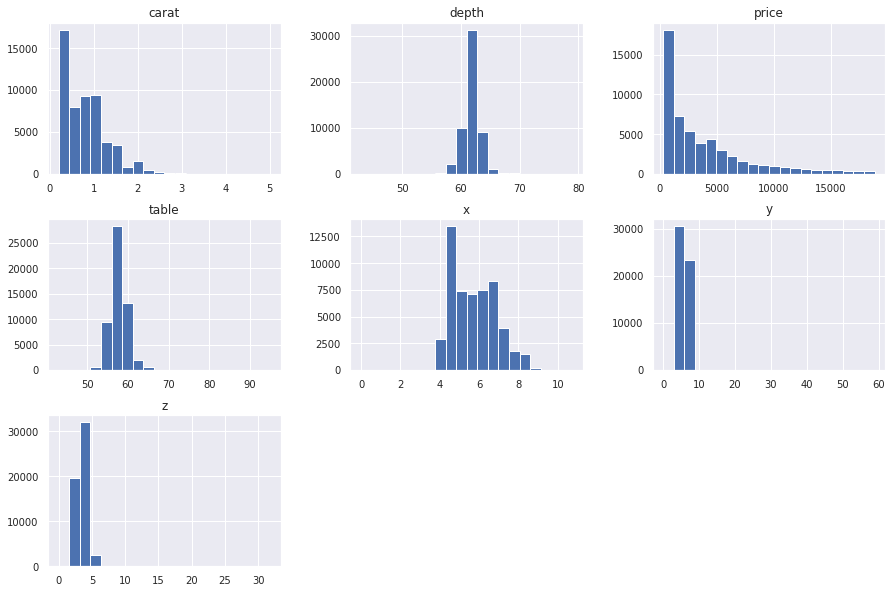

In [ ]:
# Distributions for each of numerical variables.
df[numerical_columns].hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10)

1. In the dataset, most of the diamonds are equal or less than 1 carat. Their width of the top of the diamond relative to the widest point is less than 60, and their price is less than 5000 dollars. 
2. Most of the diamonds have 4-5 lengths, 3-9 width, and 2-5 depth. 

### 3. Visualize categorical variables

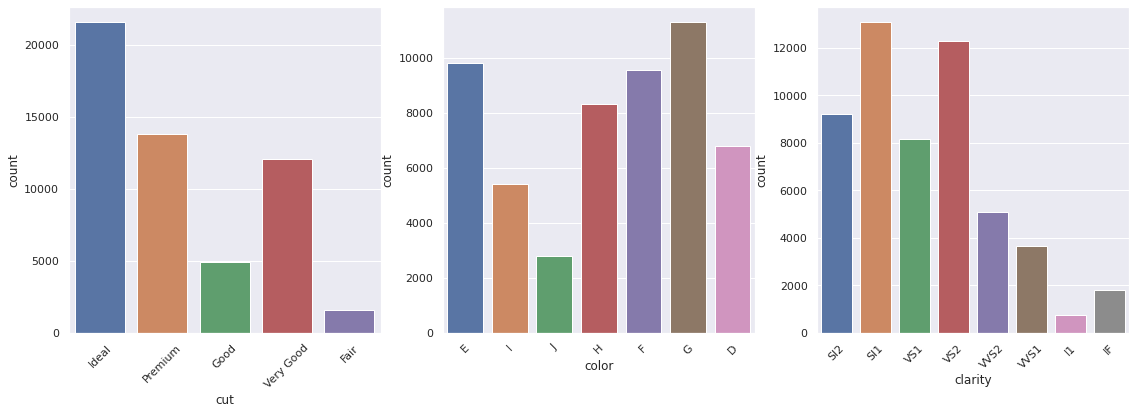

In [ ]:
# create bar chart for categorical data
fig, ax = plt.subplots(1, 3, figsize=(19, 6))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

1. Ideal, Premium, and Very Good level are the top 3 cut levels in all diamonds. There are around 5000 diamonds are in Good cut level. Approximately 2500 diamonds are in a Fair cut level.
2. Most of the diamonds are closed to the best and middle-level colors.  E, G, and F  are the most common  Color levels.  
3. Most of the diamonds are SI1 and VS2 clarity levels. 

### 4. Check the relationship between independent variables and the dependent variable


cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,163,662,2834,1603,1513
E,224,933,3903,2337,2400
F,312,909,3826,2331,2164
G,314,871,4884,2924,2299
H,303,702,3115,2360,1824
I,175,522,2093,1428,1204
J,119,307,896,808,678


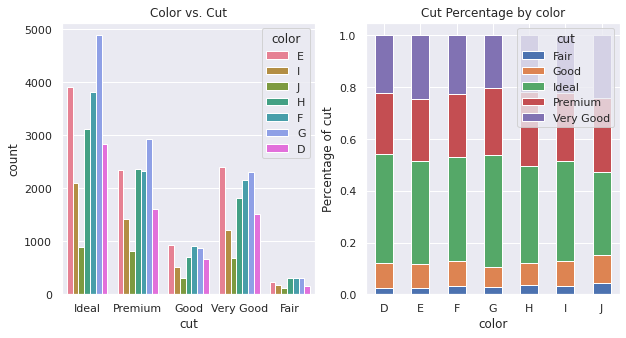

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

# show the relationship of color and cut
plt.subplot(121)
sns.countplot(x='cut',hue= 'color', data=df, palette = 'husl')
plt.title('Color vs. Cut')

# check the different cut percentages in every color 
ax= plt.subplot(122)
c_c = pd.crosstab(df.color, df.cut)
c_c.div(c_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Cut Percentage by color')
plt.xlabel('color')
plt.xticks(rotation=0)
plt.ylabel('Percentage of cut')

c_c

1. Most of the diamonds have an ideal, premium, very Good level cut. 
2. Color may appear to be relatively more “predictive” of the response variable because each color contains all types of diamonds cutting level. It is beneficial for us to predict which of the five cut values is most likely to apply to a given observation.

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,210,96,146,205,84
IF,9,71,1212,230,268
SI1,408,1560,4282,3575,3240
SI2,466,1081,2598,2949,2100
VS1,170,648,3589,1989,1775
VS2,261,978,5071,3357,2591
VVS1,17,186,2047,616,789
VVS2,69,286,2606,870,1235


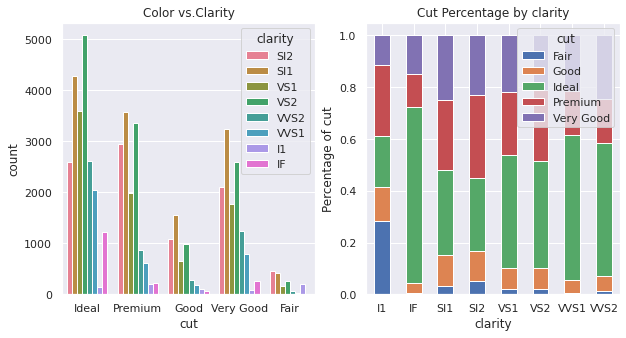

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

# compare the clarity with cut
plt.subplot(121)
sns.countplot(x='cut',hue= 'clarity', data=df, palette = 'husl')
plt.title('Color vs.Clarity')

# check the cur percentage of clarity
ax= plt.subplot(122)
c2_c = pd.crosstab(df.clarity, df.cut)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Cut Percentage by clarity')
plt.xlabel('clarity')
plt.xticks(rotation=0)
plt.ylabel('Percentage of cut')

c2_c

1. Similar to the color, clarity may appear to be relatively more “predictive” of the response variable.
2. SI1 and VS2 are the top 2 popular clarity types in each diamond's cutti

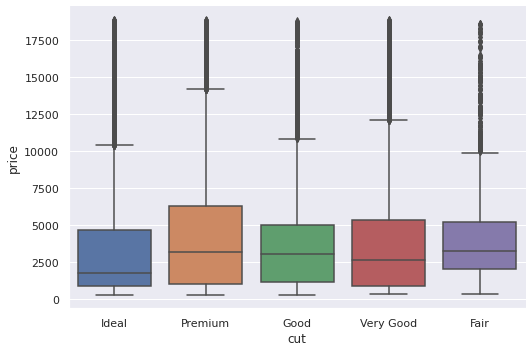

In [ ]:
# plot price vs cut
sns.catplot(x='cut', y='price', data=df, kind='box' ,aspect=1.5 )

plt.xlabel('cut')
plt.ylabel('price')
plt.show()

Premium cut level diamonds has the largest price range and highest median price in all cut levels. And the Ideal cut level diamonds have the lowest median price. 

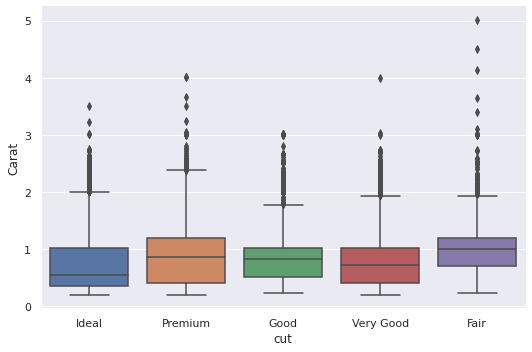

In [ ]:
# plot Carat vs cut
sns.catplot(x='cut', y='carat', data=df, kind='box' ,aspect=1.5 )

plt.xlabel('cut')
plt.ylabel('Carat')
plt.show()

Similar to the price, Premium cut level diamonds have the largest range and highest median carat in all cut levels. And the Ideal cut level diamonds have the lowest median carat. 

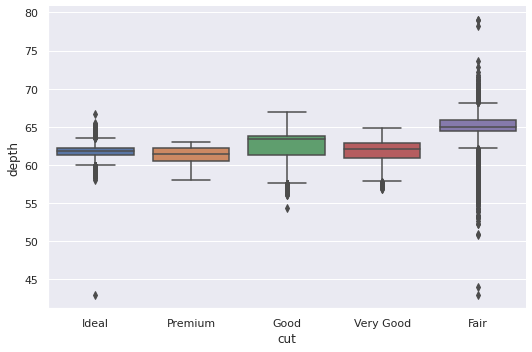

In [ ]:
# plot depth vs cut
sns.catplot(x='cut', y='depth', data=df, kind='box' ,aspect=1.5 )

plt.xlabel('cut')
plt.ylabel('depth')
plt.show()


Good cut level diamonds have the largest range. Fair cut level diamonds have the highest median diamonds' depth at all cut levels.  And the Premium cut level diamonds have the lowest median price. 

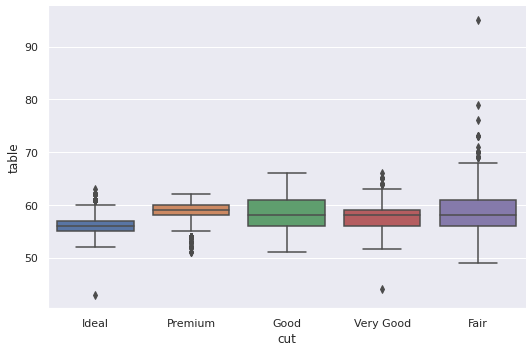

In [ ]:
# plot table vs cut
sns.catplot(x='cut', y='table', data=df, kind='box' ,aspect=1.5 )

plt.xlabel('cut')
plt.ylabel('table')
plt.show()

Good cut level diamonds have the largest range. Premium cut level diamonds have the highest median diamonds' width of the top of diamond relative to widest point at all cut levels.  And the Ideal cut level diamonds have the lowest median width of the top of the diamond relative to the widest point. 

### 5. Correlation between independent variable and numerical dependent variable.

In [ ]:
df1 = df.copy()
# use number to replace category in 'cut' column
df2 = df1.replace({'cut': {'Fair':0,'Good':1, 'Ideal': 2, 'Premium':3, 'Very Good': 4}})
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, 'Figure: Correlation')

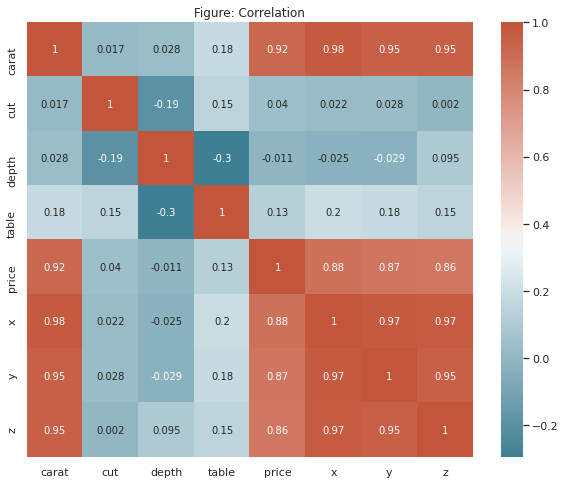

In [ ]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,8))

corr = df2.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure: Correlation')

According to the correlation, we can know depth and table appear to be relatively more “predictive” to the response variable because their absolute correlations are higher than others'. 

The feature x, y, and z have a strong positive relationship between one and other. Their correlations are equal to or more than 0.95. Therefore, x, y, and z are multicollinearity.

Although there are some very high correlation coefficients, decision trees and boosted trees algorithms are immune to multicollinearity by nature. 


***
## Step 3: Data Cleaning


### 1. Handle the zero value

There are some rows with zero values in the columns of x (length), y(width), or z(depth), N=20. We'll delete the rows with zero x,y or z since the dimond's length, width and depth should not be 0.


In [ ]:
# extract the rows that contain 0 value 
null_data = df2.loc[(df2['x']==0) | (df2['y']==0) | (df2['z']==0)]
null_data

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,3,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,3,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,3,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,3,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,1,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,2,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,4,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,2,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,0,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,3,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
# get the length of null data
len(null_data)

20

In [ ]:
# Dropping Rows with 'Zero'.
df3 = df2[(df2[['x','y','z']] != 0).all(axis=1)]

In [ ]:
# Just to Confirm the zero 
df3.loc[(df3['x']==0) | (df3['y']==0) | (df3['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


### 2. Create a New Feature 'Volume'

We discover feature x, y, and z is multicollinearity above, they can seem like as one feature. Consider a formula, diamond's depth * width * length = the diamond's volume, we decide to drop x, y, and z columns and create the Volume column. 

In [ ]:
df3['volume'] = df3['x']*df3['y']*df3['z']
df3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


###3. Drop the fatures of x, y, z

In [ ]:
# drop the features
df3.drop(['x','y','z'], axis=1, inplace= True)

In [ ]:
df3.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'volume'],
      dtype='object')

### 4. Convert categorical variable into dummy variables

In [ ]:
categorical_independent = ['color', 'clarity']

In [ ]:
df_dummy = pd.get_dummies(df3,columns=categorical_independent)
df_dummy.head()

,carat,cut,depth,table,price,volume,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,2,61.5,55.0,326,38.202030,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,3,59.8,61.0,326,34.505856,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,1,56.9,65.0,327,38.076885,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,3,62.4,58.0,334,46.724580,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,1,63.3,58.0,335,51.917250,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
print("check the column names:", df_dummy.columns.tolist())
print("\n")
print("total number of columns: ", len(df_dummy.columns.tolist()))

check the column names: ['carat', 'cut', 'depth', 'table', 'price', 'volume', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


total number of columns:  21


### 5. Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X = df_dummy.drop(['cut'], axis=1)
y = df_dummy['cut']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

###6. Feature Scaling - MinMaxScaler

We'll use the MinMaxScaler to rescale variables into the range [0,1].

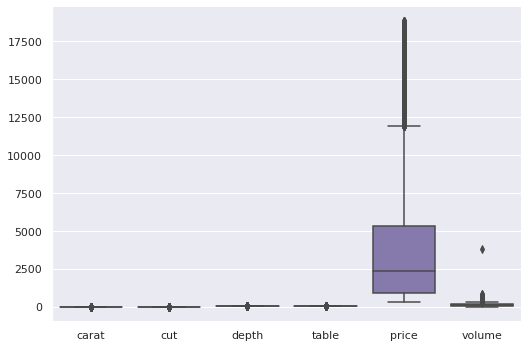

In [ ]:
# plot numerical features (non-dummy features) before scaling
sns.catplot(data=df3 , kind='box' , aspect=1.5)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_std = ['carat', 'depth', 'table', 'price', 'volume']

# Applying Feature Scaling
sc = MinMaxScaler()
X_train[columns_std] = sc.fit_transform(X_train[columns_std])

X_test[columns_std] = sc.transform(X_test[columns_std])

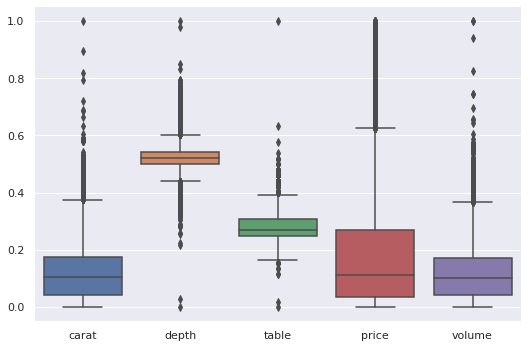

In [ ]:
# plot after Applying Feature Scaling ( MinMaxScaler )
sns.catplot(data=X_train[columns_std] , kind='box' , aspect=1.5)


After Applying Feature Scaling,  the price of diamonds has the largest range. The depth of diamonds has the highest median (around 0.5).  The volume and carat have the lowest median. 

***
## Step 4:Prepped Data Review

#### 1) Check columns: 

The total number of columns has changed from 10 to 21.

In [ ]:
print("check the column names:", df_dummy.columns.tolist())
print("\n")
print("total number of columns: ", len(df_dummy.columns.tolist()))

check the column names: ['carat', 'cut', 'depth', 'table', 'price', 'volume', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


total number of columns:  21


#### 2) Check the shape of the training set and the testing set

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Testing Features Shape:', X_test.shape)

Training Features Shape: (43136, 20)
Testing Features Shape: (10784, 20)


#### 3) Check distributions for each of numerical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e34d10320>,
      dtype=object)

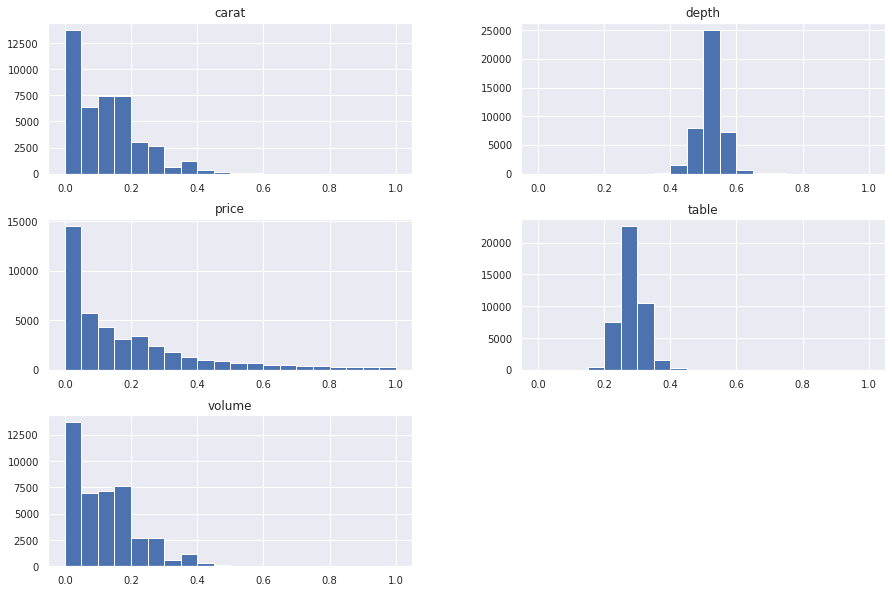

In [ ]:
# Distributions for each of numerical variables
X_train[columns_std].hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10)

After data preparation, there is no much change for each numerical column.

#### 4) Check volume (new feature) vs cut

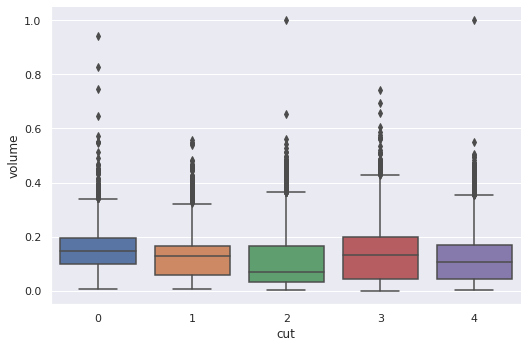

In [ ]:
# plot volume vs cut
# merge training set
df_train = pd.concat([X_train, y_train], axis=1)

sns.catplot(x='cut', y='volume', data=df_train, kind='box' ,aspect=1.5 )

plt.xlabel('cut')
plt.ylabel('volume')
plt.show()

Premium cut level diamonds have the largest range. Fair cut level's diamonds have the highest median price in all cut levels. And the Ideal cut level diamonds have the lowest median price. 

***
## Step 5. Classifier Modeling + Select Models

We'll perform feature selection firstly. Then, we'll build Decision Tree, Random Forest, Gradient Boosting Classifier, Stochastic Gradient Descent Classifier, and XG Boost Classifier. 

For each classifier, we'll build baseline model using the default parameters. Then we'll use `RandomizedSearchCV` here for optimizing parameters. Random search differs from grid search mainly in that it searches the specified subset of hyperparameters randomly instead of exhaustively. `RandomizedSearchCV` decreases the processing time since it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.

https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Also, we'll compare the base model and the tuned model by using 5-fold cross validation and evaluate models based on accuracy, recall, and F1. Since the dependent variable is multi-class not binary class, we'll use macro-averaged Recall and F1 scores, which calculate metrics for each class individually and then takes unweighted mean of the measures. For the accuracy, we'll check and compare it with the null error rate. 

**Check null error rate:**

Null error rate: This term is used to define how many times your prediction would be wrong if you can predict the majority class.



In [ ]:
# https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# calculate null error rate (for multi-class classification problems)
y_test.value_counts().head(1)/len(y_test)

2    0.401057
Name: cut, dtype: float64

In [ ]:
y_test.value_counts()

2    4325
3    2768
4    2363
1     988
0     340
Name: cut, dtype: int64

This means that a dumb model that always predicts the majority class (2) would be right 40% of the time. It's a good way to know the minimum we should achieve with our models. 

**Create a function for model evaluation on the training set:**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Create a function for Model Evaluation Using Cross-Validation
def cross_val_score_multilabel (model, X_train, y_train):
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    print('Model Mean Accuracy (training set):{} '.format(np.mean(accuracy_scores)))
    print('Macro Recall (training set):{} '.format(np.mean(recall)))
    print('Macro F1 score (training set):{} '.format(np.mean(f1)))

### 5.1 Feature Selection - Tree-based `SelectFromModel`

We'll also use SelectFromModel RandomForest to select features based on feature importance. We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2



In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=20)
embeded_rf_selector.fit(X_train, y_train.values.ravel())

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

5 selected features


In [ ]:
embeded_rf_feature

['carat', 'depth', 'table', 'price', 'volume']

The features selected in this step corresponds to our domain knowledge findings. Therefore, we'll use 5 features for Classifier Modeling, they are 'carat', 'depth', 'table', 'price', and 'volume'. 


In [ ]:
# Model with five features:
X_train_new = X_train[['carat', 'depth', 'table', 'price', 'volume']]

X_test_new = X_test[['carat', 'depth', 'table', 'price', 'volume']]

print('Training Features Shape:', X_train_new.shape)
print('Testing Features Shape:', X_test_new.shape)

Training Features Shape: (43136, 5)
Testing Features Shape: (10784, 5)


### 5.2 Decision Tree

#### 1) Check default hyperparameters of Decision Tree Model:

In [ ]:

# print all the default parameters in the DecisionTree model
from sklearn.tree import DecisionTreeClassifier
dtc01 = DecisionTreeClassifier(random_state = 0)
from pprint import pprint

# Look at default parameters 
print('Parameters currently in use:\n')
pprint(dtc01.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


#### 2) Create Decision Tree model with default hyperparameters:

We will use five features deriving from our feature selection to build the decision tree model, they are 'carat', 'depth', 'table', 'price', 'volume'. 

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Instantiate
# default criterion=gini
dtc01 = DecisionTreeClassifier(random_state=0)

dtc01.fit(X_train_new, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### 3) Tune Hyperparameter - Decision Tree Model

To find the best decision Tree model, we should find out the most appropriate Hyperparameter and then using the tunning Hyperparameter to build model.

We'll  adjust the following set of parameters since we think them may be more affected in our models:

max_depth: the first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.

max_features: it represents the number of features to consider when looking for the best split.

min_samples_leaf: it is the minimum number of samples required to be at a leaf node. 

min_samples_split: it represents the minimum number of samples required to split an internal node. 

criterion: it measures the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [ ]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid  
param_dist = {"max_depth": [3,5,6,7,8], 
              'max_features': ['auto', 'sqrt', 'log2'],
              "min_samples_leaf": randint(1, 9), 
              'min_samples_split': [2, 4, 6],
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train_new, y_train.values.ravel()) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score is 0.7194683202605011


From above we get the tuned tree parameters, then we'll use these parameters to build tree model again and compare their score.

In [ ]:
# tuned model:
dtc001 = DecisionTreeClassifier(random_state = 0, max_depth = 8, max_features='log2', criterion= 'entropy',    
                                      min_samples_split = 2, min_samples_leaf= 1)

dtc001.fit(X_train_new,y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### 4) Decision Tree Model Evaluation on training set


In [ ]:
# base model:
cross_val_score_multilabel (dtc01, X_train_new, y_train.values.ravel())

Model Mean Accuracy (training set):0.6383762496144894 
Macro Recall (training set):0.6415435943122301 
Macro F1 score (training set):0.6413009973319292 


In [ ]:
# tuned model:
cross_val_score_multilabel (dtc001, X_train_new, y_train.values.ravel())

Model Mean Accuracy (training set):0.70901303972891 
Macro Recall (training set):0.6495522721417262 
Macro F1 score (training set):0.6525255053688201 


**Results - Decision Tree Model Evaluation:**

Build a chart to show their Accuracy, Macro F1 Score, and Macro Recall.


| Metric        | Base Decision Tree Model  | Tuned Decision Tree Model
| ------------- | ------- | ------- | 
| # Indep. Vars |  5     |   5     |   
| The Accuracy of the model  | 0.638  | 0.709 |
| Macro F1 Score      | 0.641  |0.653 |  
| Macro Recall           |0.642 | 0.65 |


From the results above, the tuned Decision Tree model did perform better than the base model. We can see that the tuned model has  higher accuracy, macro F1, and macro recall scores that means the tuned model works better. The accuacy is higher than the null error rate. So in our Decisison Tree models, we select tuned model with 5 features as our best model.


### 5.3 Random Forest

Just like the decision tree model, we'll tune the hyperparameters for random model. Then, compare the performance of the base Random Forest models with the tuned models.

####1) Check default hyperparameters of Random Forest model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf01 = RandomForestClassifier(random_state = 0)
from pprint import pprint

# Look at default parameters 
print('Parameters currently in use:\n')
pprint(rf01.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### 2) Define and Train the Base Model with default hyperparameters


In [ ]:
rf_base01 = RandomForestClassifier(random_state=0)
rf_base01.fit(X_train_new, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### 3) Use `RandomizedSearchCV` for optimizing parameters

There are several hyperparameters but we will try to adjust the following set of them since we think them may be more affected in our models:

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

criterion measures the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.




In [ ]:
# Creating the hyperparameter grid 
model_params = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split': [2, 4, 6],
    "criterion": ["gini", "entropy"]
}

# create random forest classifier model
rf_model001 = RandomForestClassifier(random_state=0)

# Instantiating RandomizedSearchCV object 
clf001 = RandomizedSearchCV(rf_model001, model_params, cv=5)

clf001.fit(X_train_new, y_train.values.ravel()) 

# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(clf001.best_params_)) 
print("Best score is {}".format(clf001.best_score_)) 

Tuned Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'}
Best score is 0.738269585643374


In [ ]:
# tuned model:
tuned_model001 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

tuned_model001.fit(X_train_new,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

For tuned Random Forest model, the winning values of max_features, n_estimators, max_depth, min_samples_split, and criterion were 'log2', 200, 8, 4, and 'entropy' respectively.

#### 4) Random Forest Model Evaluation on training set





In [ ]:
# base model:
cross_val_score_multilabel (rf_base01, X_train_new, y_train.values.ravel())

Model Mean Accuracy (training set):0.7128383713432384 
Macro Recall (training set):0.7001847371097005 
Macro F1 score (training set):0.703588375663385 


In [ ]:
# tuned model:
cross_val_score_multilabel (tuned_model001, X_train_new, y_train.values.ravel())

Model Mean Accuracy (training set):0.738269585643374 
Macro Recall (training set):0.7128811441124367 
Macro F1 score (training set):0.7144994026012605 


**Random Forest Model Evaluation Results:**


| Metric        | Base Random Forest Model  | Tuned Random Forest Model
| ------------- | ------- | ------- | 
| # Indep. Vars |  5     |   5     |   
| The Accuracy of the model  | 0.713  | 0.738 |
| Macro F1 Score      | 0.700  |0.713 |  
| Macro Recall           |0.703 | 0.714 |


From the results above, the tuned model performed better than the base model, having higher accuracy, Macro F1 Score, and macro Recall score. The accuacy is higher than the null error rate. We prefer the tuned model for Random Forest. 




### 5.4 Gradient Boosting Classifier

#### 1) Check default hyperparameters of Gradient Boosting Model

In [ ]:
# print all the default parameters in the GradientBoosting model
from sklearn.ensemble import GradientBoostingClassifier
gb01 = GradientBoostingClassifier()

from pprint import pprint
# Look at default parameters 
print('Parameters currently in use:\n')
pprint(gb01.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


#### 2) Define and Train the Base Model with default hyperparameters

In [ ]:
# base model
from sklearn.model_selection import cross_val_score

base_gb = GradientBoostingClassifier()
base_gb.fit(X_train_new, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### 3) Parameter Tuning in Gradient Boosting

The overall parameters of Gradient Boosting model can be divided into 3 categories:
(https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) 

* Tree-Specific Parameters: These affect each individual tree in the model.
* Boosting Parameters: These affect the boosting operation in the model.
* Miscellaneous Parameters: Other parameters for overall functioning.

Most data scientist see number of trees, tree depth and the learning rate as most crucial parameters. We will start off with the n_estimators, ans then move to learning_rate, and max_depth.

We did many rounds of tuning parameter, but we cannot get the results after it run many hours. Therefore, we'll only tune these 3 parameters.

https://www.datacareer.ch/blog/parameter-tuning-in-gradient-boosting-gbm-with-python/

**a) Tuning n_estimators:**

The n_estimators captures the number of trees that we add to the model. 


In [ ]:
# 1. Creating the hyperparameter grid - n_estimators.
gbc = GradientBoostingClassifier()
parameters01 = {
    "n_estimators":[100,250,500]
}

# Use the RandomizedSearchCV() for the cross -validation
from sklearn.model_selection import RandomizedSearchCV 

tuned_gb01 = RandomizedSearchCV(gbc,parameters01,cv=2,random_state=0)
tuned_gb01.fit(X_train_new,y_train.values.ravel())


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
# Print the tuned parameters and score 
print("Tuned Gradient Boosting Parameter: {}".format(tuned_gb01.best_params_)) 
print("Best score is {}".format(tuned_gb01.best_score_)) 


Tuned Gradient Boosting Parameter: {'n_estimators': 500}
Best score is 0.7434624956988601


**b) Tuning Learning rate:**

The learning rate shrinks the contribution of each tree by learning_rate.


In [ ]:
# 2. Creating the hyperparameter grid - learning_rate.
gbc02 = GradientBoostingClassifier(n_estimators=500)
parameters02 = {
    "learning_rate":[0.01,0.1,1]
}

# Use the RandomizedSearchCV() for the cross -validation
from sklearn.model_selection import RandomizedSearchCV 

tuned_gb02 = RandomizedSearchCV(gbc02,parameters02,cv=5,random_state=0)
tuned_gb02.fit(X_train_new,y_train.values.ravel())

# Print the tuned parameters and score 
print("Tuned Gradient Boosting Parameter: {}".format(tuned_gb02.best_params_)) 
print("Best score is {}".format(tuned_gb02.best_score_)) 

Tuned Gradient Boosting Parameter: {'learning_rate': 0.1}
Best score is 0.7409123946398728


**c) Tuning max_depth:**

The max_depth bounds the maximum depth of the tree. 

In [ ]:
# 3. Creating the hyperparameter grid - max_depth.
gbc03 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1)
parameters03 = {
    "max_depth":[2,3,4]
}

tuned_gb03 = RandomizedSearchCV(gbc03,parameters03,cv=5,random_state=0)
tuned_gb03.fit(X_train_new,y_train.values.ravel())

# Print the tuned parameters and score 
print("Tuned Gradient Boosting Parameter: {}".format(tuned_gb03.best_params_)) 
print("Best score is {}".format(tuned_gb03.best_score_)) 

Tuned Gradient Boosting Parameter: {'max_depth': 4}
Best score is 0.7439957000154609


From the results above, the max_depth of the tuned Gradient Boosting model has changed from 3 to 4. The 'n_estimators' has changed from 100 to 500. But the learning_rate didn't change and keep the same as the learning_rate of the base model(0.1).

In [ ]:
# tuned Gradient Boosting model:
tuned_gb = GradientBoostingClassifier(random_state = 0, n_estimators = 500, max_depth=4, learning_rate=0.1)
tuned_gb.fit(X_train_new, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### 4) Gradient Boosting Model Evaluation on training set


In [ ]:
# base Gradient Boosting model:
cross_val_score_multilabel (base_gb, X_train_new, y_train)

Model Mean Accuracy (training set):0.7408660285798289 
Macro Recall (training set):0.7219254684180936 
Macro F1 score s(training set):0.7252224848785971 


In [ ]:
# Tuned Gradient Boosting model:
cross_val_score_multilabel (tuned_gb, X_train_new, y_train)

Model Mean Accuracy (training set):0.7433002332973765 
Macro Recall (training set):0.7245572558846568 
Macro F1 score s(training set):0.7279518263384455 


**Gradient Boosting Model Evaluation Results:**

As shown below, the tuned Gradient Boosting model has higher Macro F1 and recall scores, and the acuracy score is higher than the null error rate. Therefore, we prefer the tuned Model for Gradient Boosting.

| Metric        | Base Gradient Boosting Model  | Tuned Gradient Boosting Model
| ------------- | ------- | ------- | 
| # Indep. Vars |  5     |   5     |   
| The Accuracy of the model  | 0.741  | 0.743 |
| Macro F1 Score      | 0.725  |0.728 |  
| Macro Recall           |0.722 | 0.725 |



### 5.5 Stochastic Gradient Descent Classifier

#### 1) Check default hyperparameters of Stochastic Gradient Descent model

In [ ]:
# print all the default parameters in the Stochastic Gradient Descent model
from sklearn.linear_model import SGDClassifier
sgd01 = SGDClassifier()

from pprint import pprint
# Look at default parameters 
print('Parameters currently in use:\n')
pprint(sgd01.get_params())


Parameters currently in use:

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


#### 2) Define and Train the Base Model with default hyperparameters

In [ ]:
# base model
base_sgd = SGDClassifier()
base_sgd.fit(X_train_new, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### 3) Use `RandomizedSearchCV` for optimizing parameters

We'll tune the following parameters:

loss: the concrete loss function can be set via the loss parameter. SGDClassifier supports the following loss functions:
loss="hinge": (soft-margin) linear Support Vector Machine,
loss="modified_huber": smoothed hinge loss,
loss="log": logistic regression;

penalty: the concrete penalty can be set via the penalty parameter. SGD supports the following penalties:
penalty="l2": L2 norm penalty on coef_.
penalty="l1": L1 norm penalty on coef_.
penalty="elasticnet": Convex combination of L2 and L1;

alpha: constant that multiplies the regularization term. The higher the value, the stronger the regularization. 

learning_rate, class_weight, and eta0.

In [ ]:
# https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624

loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100]

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           class_weight=class_weight,
                           eta0=eta0)

In [ ]:
# Use the RandomizedSearchCV() for the cross -validation
from sklearn.model_selection import RandomizedSearchCV 

sgd02 = SGDClassifier()

tuned_sgd = RandomizedSearchCV(sgd02,param_distributions,cv=3,random_state=0)
tuned_sgd.fit(X_train_new,y_train.values.ravel())

# Print the tuned parameters and score 
print("Tuned Stochastic Gradient Descent Parameter: {}".format(tuned_sgd.best_params_)) 
print("Best score is {}".format(tuned_sgd.best_score_)) 

Tuned Gradient Boosting Parameter: {'penalty': 'l1', 'loss': 'hinge', 'learning_rate': 'adaptive', 'eta0': 100, 'class_weight': {1: 0.7, 0: 0.3}, 'alpha': 0.0001}
Best score is 0.560390924768564


In [ ]:
# tuned sgd model:
tuned_sgd02 = SGDClassifier(alpha=0.0001, average=False, class_weight={1: 0.7, 0: 0.3},
              early_stopping=False, epsilon=0.1, eta0=100, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

tuned_sgd02.fit(X_train_new,y_train.values.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight={0: 0.3, 1: 0.7},
              early_stopping=False, epsilon=0.1, eta0=100, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### 4) Stochastic Gradient Descent Model Evaluation on training set

In [ ]:
# base sgd model:
cross_val_score_multilabel (base_sgd, X_train_new, y_train.values.ravel())

Model Mean Accuracy (training set):0.5500976411831212 
Macro Recall (training set):0.4086437323844014 
Macro F1 score (training set):0.38092172936844365 


In [ ]:
# tuned sgd model:
cross_val_score_multilabel (tuned_sgd02, X_train_new, y_train.values.ravel())

Model Mean Accuracy (training set):0.5460396194436298 
Macro Recall (training set):0.4574410809939403 
Macro F1 score (training set):0.42375959497218263 


**Stochastic Gradient Descent Model Evaluation Results:**

From the table below, the tuned Stochastic Gradient Descent Model performed better than the base model. The accuacy is higher than the null error rate. We'll pick the tuned model as the best Stochastic Gradient Descent Model.

| Metric        | Base Stochastic Gradient Descent Model  | Tuned Stochastic Gradient Descent Model
| ------------- | ------- | ------- | 
| # Indep. Vars |  5     |   5     |   
| The Accuracy of the model  | 0.55  | 0.546 |
| Macro F1 Score      | 0.38  |0.424|  
| Macro Recall           |0.409 | 0.457 |

### 5.6 XG Boost Classifier
XG Boost is the famous Kaggle winning package. 

#### 1) Check default hyperparameters of Stochastic Gradient Descent model

In [ ]:
from xgboost import XGBClassifier

xgb01 = XGBClassifier()

from pprint import pprint
# Look at default parameters 
print('Parameters currently in use:\n')
pprint(xgb01.get_params())


Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


####2) Define and Train the Base Model with default hyperparameters

In [ ]:
# base XGB model
base_xgb = XGBClassifier()
base_xgb.fit(X_train_new, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### 3) Use `RandomizedSearchCV` for optimizing parameters


In [ ]:
# https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d

xgb02 = XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

tuned_xgb = RandomizedSearchCV(xgb02, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,random_state=0)

tuned_xgb.fit(X_train_new, y_train)

In [ ]:
best_score = tuned_xgb.best_score_
best_params = tuned_xgb.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.7398460682492582
Best params: 
colsample_bylevel: 0.6
colsample_bytree: 0.8
gamma: 0
learning_rate: 0.01
max_depth: 15
min_child_weight: 0.5
n_estimators: 100
reg_lambda: 10.0
silent: False
subsample: 0.7


In [ ]:
# tuned xgb model:
tuned_xgb02 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=0.5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.7, verbosity=1)

tuned_xgb02.fit(X_train_new,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=0.5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.7, verbosity=1)

#### 4) XG Boost Model Evaluation on training set

In [ ]:
# base xgb model:
cross_val_score_multilabel (base_xgb, X_train_new, y_train.values.ravel())

Model Mean Accuracy (training set):0.7396141879498865 
Macro Recall (training set):0.7178202408737315 
Macro F1 score (training set):0.7205363051776252 


In [ ]:
# tuned xgb model:
cross_val_score_multilabel (tuned_xgb02, X_train_new, y_train.values.ravel())

Model Mean Accuracy (training set):0.7427669833025756 
Macro Recall (training set):0.7191319646117815 
Macro F1 score (training set):0.7250750375613391 


**XG Boost Model Evaluation Results:**

From the table below, the tuned XG Boost Model performed better than the base model. The accuacy is higher than the null error rate. We'll pick the tuned model as the best XG Boost Model.

| Metric        | Base XG Boost Model  | Tuned XG Boost Model
| ------------- | ------- | ------- | 
| # Indep. Vars |  5     |   5     |   
| The Accuracy of the model  | 0.7396  | 0.7428 |
| Macro F1 Score      | 0.72  |0.725|  
| Macro Recall           |0.7178 | 0.7191 |

### 5.7 Compare Models


| Metric        | Tuned Decision Tree Model| Tuned Random Forest Model | Tuned Gradient Boosting Model  | Tuned Stochastic Gradient Descent Model  | Tuned XG Boost Model 
| -------------  | ------- |  ------- | ------- | ------- | ------- | 
| # Indep. Vars |  5     |   5     |   5     |   5     |  5  |
| The Accuracy of the model  | 0.709 | 0.738 | 0.743  |  0.546 | 0.7428 |
| Macro F1 Score      | 0.653  |0.714 |  0.728 | 0.424| 0.725|  
| Macro Recall           |0.65 | 0.713 | 0.725 | 0.457 | 0.7191 |


**Results:**

The Tuned Gradient Boosting Model	has the highest accuracy, Macro F1 Score, and recall. The accuracy is higher than the null error rate. Finally, we choose the Tuned Gradient Boosting Model as our final model. 

#### 5.8 Apply the final preferred model to the testing subset:

Since this is a multi-class classification, we'll use `multilabel_confusion_matrix` to compute a confusion matrix for each class. 

In [ ]:
#predict on the testing set
y_pred_final = tuned_gb.predict(X_test_new)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

print("Gradient Boosting Model Tuned model:")
mcm01 = multilabel_confusion_matrix(y_test, y_pred_final)
print("Multi-label Confusion Matrix\n{}".format(mcm01))
print("Classification Report")
print(classification_report(y_test, y_pred_final))

Gradient Boosting Model Tuned model:
Multi-label Confusion Matrix
[[[10404    40]
  [   40   300]]

 [[ 9609   187]
  [  335   653]]

 [[ 5565   894]
  [  345  3980]]

 [[ 6884  1132]
  [  505  2263]]

 [[ 7945   476]
  [ 1504   859]]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       340
           1       0.78      0.66      0.71       988
           2       0.82      0.92      0.87      4325
           3       0.67      0.82      0.73      2768
           4       0.64      0.36      0.46      2363

    accuracy                           0.75     10784
   macro avg       0.76      0.73      0.73     10784
weighted avg       0.74      0.75      0.73     10784



In [ ]:
#predict on the training set
y_pred_train = tuned_gb.predict(X_train_new)

mcm02 = multilabel_confusion_matrix(y_train, y_pred_train)
print("Multi-label Confusion Matrix\n{}".format(mcm02))
print("Classification Report")
print(classification_report(y_train, y_pred_train))

Multi-label Confusion Matrix
[[[41851    16]
  [   14  1255]]

 [[38894   328]
  [  970  2944]]

 [[22811  3102]
  [ 1104 16119]]

 [[28094  4030]
  [ 1466  9546]]

 [[32173  1245]
  [ 5167  4551]]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1269
           1       0.90      0.75      0.82      3914
           2       0.84      0.94      0.88     17223
           3       0.70      0.87      0.78     11012
           4       0.79      0.47      0.59      9718

    accuracy                           0.80     43136
   macro avg       0.84      0.80      0.81     43136
weighted avg       0.80      0.80      0.79     43136



**Compare train and test - Gradient Boosting Model Evaluation:**


| Metric        | Model used in training set | Model used in testing set|
| ------------- | ------- | ------- | 
| # Indep. Vars |  5     |   5    |     
| The Accuracy of the model  | 0.80  | 0.75  | 
| macro F1 Score      | 0.81  | 0.73  | 
| macro Recall           |0.80  | 0.73 | 



From the results above, the Gradient Boosting model performs as well as expected in the testing set. 

***
## Step 6. Conclusion

### Print out the variable importance:

[0.02418438 0.37486024 0.46836936 0.07004702 0.06253899]


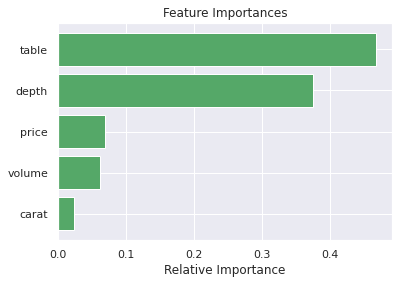

In [ ]:
print(tuned_gb.feature_importances_)
importances = tuned_gb.feature_importances_
indices = np.argsort(importances)
features = X_train_new.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Results:**


From the plot above, we can see that the most important feature to predict the diamond cut is the diamond table. Next is diamond depth. The diamond carat is the least important feature to make predictions.